<a href="https://colab.research.google.com/github/forthebest/CFTC-COT/blob/master/crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd

In [2]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [3]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-09-30 01:37:05.712276')

In [4]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [5]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

In [6]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-30 02:00:00,19526,19546,19447,19509,13.981500,2.724975e+05
2022-09-30 03:00:00,19510,19510,19353,19360,43.692900,8.480812e+05
2022-09-30 04:00:00,19371,19418,19319,19399,106.789051,2.069773e+06
2022-09-30 05:00:00,19400,19469,19391,19431,25.694612,4.992382e+05
2022-09-30 06:00:00,19433,19497,19427,19447,41.229454,8.027453e+05


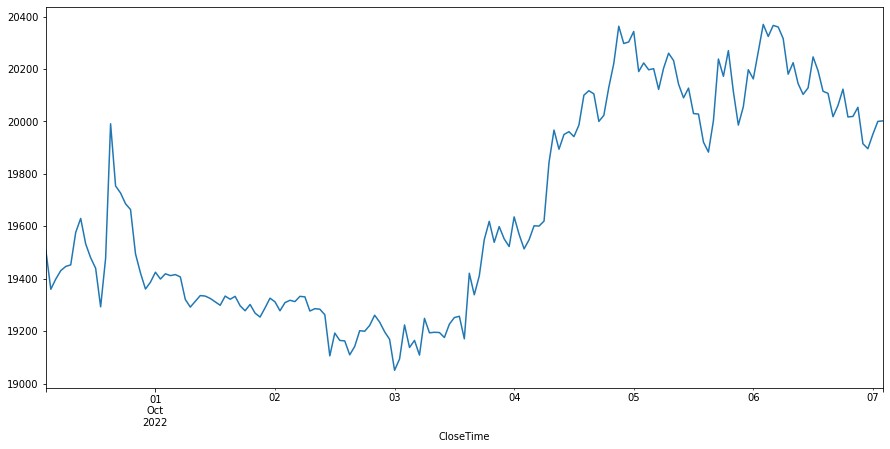

In [7]:
btc['ClosePrice'].plot(figsize=(15, 7))

Ether:

In [8]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-30 02:00:00,1337.5,1338.1,1328.6,1336.1,259.257414,345749.651845
2022-09-30 03:00:00,1336.0,1336.9,1325.4,1328.5,157.158886,209013.618941
2022-09-30 04:00:00,1327.0,1329.4,1320.2,1327.4,385.468070,510211.833508
2022-09-30 05:00:00,1327.5,1331.1,1325.9,1328.9,59.139517,78549.533184
2022-09-30 06:00:00,1328.6,1335.8,1328.4,1330.1,51.506836,68609.062325


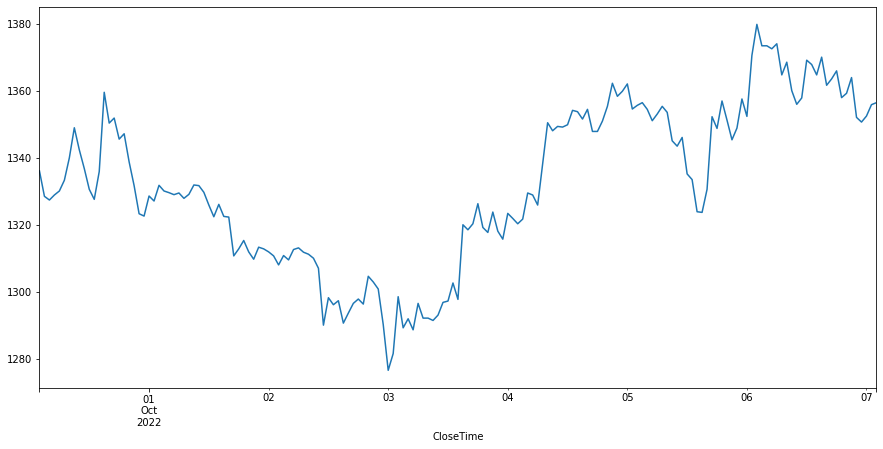

In [9]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [10]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [11]:


output_notebook()



In [14]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

In [15]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [16]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [17]:
eth.to_excel(writer, sheet_name='Ether')

In [18]:
writer.save()